-------------------
-------------------
-------------------
# Statistical Thinking in Python (Part 1)

DataCamp: https://www.datacamp.com/courses/statistical-thinking-in-python-part-1

-------------------
-------------------
-------------------

## Exploratory Data Analysis (EDA)

* The process of organizing, plotting, and summarizing a data set
* John Tukey, "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."

----------------------------------------------
### Graphical EDA

#### Histograms

* **binning bias**: The same data may be interpreted differently depending on choice of bins.
* not all of the data are displayed. Data are combined in bins.

#### Bee swarm plot

* **problem**: endes can have overlapping points because we have to fit it in a plot.

#### Empirical cumulative distribution functions (ECDFs)

* the probability that our data is less than a particular value on the x-axis is equal to the corresponding value on the y-axis.
* x-axis is a sorted data (**np.sort()**)
* y-axis is evenly spaced data points with a maximum of 1 (**np.arrange(1, len(x) + 1) / len(x)**)
* to plot ecdf: **plt.plot(x, y, marker='.', linestype='none')**
* to make sure non of the data points run off plot edges: **plt.margins(0.02)**

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

----------------------------------------
### Summary statistics

#### Sample mean and median

* **Mean**
    * ${\text{mean}} = \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$
    * heavily influenced by outliers
    * **np.mean()**
* **Median**
    * The middle value of a data set (50th percentile)
    * **np.median()**
    
#### Percentiles, outliers, and box plots

* **Percentiles**
    * $50\%$ of the data are below 50th percentile.
    * **np.percentile(data, [25, 50, 75])** will return 25th, 50th, 75th percentiles


* **Box plots**
    * **sns.boxplot(x, y, data)**
    * The box shows 25th, 50th, 75th percentiles
    * Hight of the box = **IQR = Interquartile Range = 75th - 25th percentile**
    * **Whiskers = 1.5 IQR** or the extent of data. Whichever is less extreme
    * The points outside the whiskers are **outliers**. No definition of outliers but usually points that are 2 IQR away from the median are considered outliers.
    * **sns.boxplot()**
    
#### Variance and Standard Deviation

* **Variance**
    * variability of the data
    * Average of the squared distances from the mean
    * ${\text{variance}} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2$
    * **np.var()**
    
* **Standard Deviation**
    * square root of variance
    * ${\text{standard deviation}} = \sqrt{{\text{variance}}}$
    * has the same units as the data
    * **np.std()**
    
#### Covariance and Pearson Correlation Coefficient

* **Covariance**
    * A measure of how two quantities vary together
    * ${\text{covariance}} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$
    * $x$ and $y$ are **positively correlated, covariance $>0$**, if $x$ and $y$ are both above or both below their means.
    * $x$ and $y$ are **negatively correlated, covariance $<0$**, if $x$ is high and $y$ is low, or $x$ is low and $y$ is high.
    * **np.cov()**
    
* **Pearson Correlation Coefficient**
    * $\rho = {\text{Pearson Correlation}} = \frac{{\text{covariance}}}{{\text{(std of x)(std of y)}}} = \frac{{\text{variability due to codependence}}}{{\text{independent variability}}}$
    * $\rho$ is dimensionless, $-1 < \rho < 1$
    * if $\rho = 0$, there is no correlation at all
    * if $\rho < 0$, $x$ and $y$ are negatively correlated
    * if $\rho > 0$, $x$ and $y$ are positively correlated
    * **np.corrcoef()**

-----------
-----------
## Probabilistic Logic and Statistical Inference

* Probabilistic reasoning allows to describe uncertainty
* Statistical inference is the process by which we go from measured data to probabilistic conclusions about what we might expect if we the same data again

------------
### Random Number Generator and Hacker Statistics

* **hacker Statistics**: Uses simulated repeated measurements to compute probabilities
* **np.random.random()** draws a number between 0 and 1
* **np.random.seed()** if we need reproducability

In [11]:
import numpy as np
np.random.seed(42)

n_all_heads = 0 # initialize number of 4-head coin-flip trials

for _ in range(10000):
    random_numbers = np.random.random(size=4)
    heads = random_numbers < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads/10000   # the probability of getting all 4 heads

0.0618

In [14]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1 

    return n_success

### Probability Mass Function (PMF)

* The set of probabilities of **discrete** outcomes
* The outcome of rolling a single fair die is Discrete Uniformly distributed

#### Binomial Distribution

* The number $r$ of successes in $n$ Bernoulli trials with probability $p$ of success, is binomially distributed
* **np.random.binomial(n, p)**
* np.random.binomial(60, 0.8, size=10000): do 60 Bernoulli trials with 0.8 probability of success 10000 times.

#### Poisson processes and the Poisson distribution

* The number $r$ of arrivals of a Poisson process in a given time interval with average rate of $\lambda$ arrivals per interval is Poisson distributed
* The timing of the next event is completely independent of when the previous event happened
* Example: hit on a website during a given hour
* Poisson distribution is the limit of the Binomial distribution for low probability of success and large number of trials
* **np.random.poisson(lam, size)**

### Probability Density Functions (PDF) 

* Continuous analog to PMF
* Mathematical description of the likelihood of observing a value of a continous variable

#### Normal PDF

* Describes a continuous variable whose PDF has a single symmetric peak
* two parameters, **mean** and the **standard deviation**
    * mean of a Normal distribution $\ne$ mean computed from data
    * standard deviation of Normal distribution $\ne$ standard deviation computed from data
* **np.random.nomral(mean, std, size)**

Let's compare the distribution of the housing prices in Boston to the theoretical normal distribution.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn import datasets
sns.set()
%matplotlib inline

def compare_to_theor_normal(data):
    """ Plot cumulative distribution of the data we have and the theoretical normal
        with the same mean and standard deviation
    """
    # compute the mean and standard deviation of our data
    mean = np.mean(data)
    std = np.std(data)
    
    # draw 10000 random normals with mean=mean, std=std
    samples = np.random.normal(mean, std, size=10000)
    
    # cumulative distribution for data and theoretical normals with the same mean and std
    x, y = ecdf(data)
    x_theor, y_theor = ecdf(samples)
    
    _ = plt.plot(x_theor, y_theor)
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.ylabel('CDF')

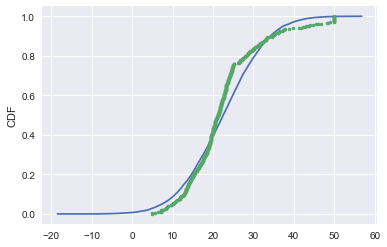

In [39]:
prices = datasets.load_boston().target
compare_to_theor_normal(prices)

We see that Boston housing prices, green, has longer right tail than normal distribution.

#### The Exponential distribution

* The waiting time between arrivals of Poisson process is Exponentially distributed
* single parameter, mean waiting time
* **np.random.exponential(mean, size)**

Let's compare the distribution of the housing prices in Boston to the theoretical exponential distribution.
* This doesn't make much sense as we can tell without plotting that the prices are not exponential. All the prices are recorded at the same time so we can't compare the time passed between the two prices. But let's do this just for quick plotting.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn import datasets
sns.set()
%matplotlib inline

def compare_to_theor_exponential(data):
    """ Plot cumulative distribution of the data we have
        and the theoretical exponential with the same mean 
    """
    # compute the mean of our data
    mean = np.mean(data)
    
    # draw 10000 random exponentials with mean=mean
    samples = np.random.exponential(mean, size=10000)
    
    # cumulative distribution for data and theoretical exponentials with the same mean
    x, y = ecdf(data)
    x_theor, y_theor = ecdf(samples)
    
    _ = plt.plot(x_theor, y_theor)
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.ylabel('CDF')

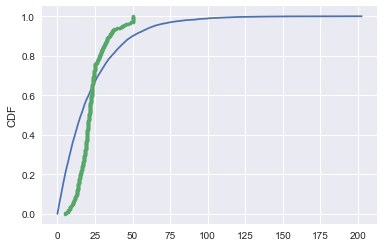

In [45]:
prices = datasets.load_boston().target
compare_to_theor_exponential(prices)

The housing prices in Boston are not at all exponential as we would expect.